# Final Design Calculations

## Find SFDs and BMDs, set loads

In [13]:
import matplotlib.pyplot as plt
import math

L = 1200 # Length of bridge
n = 1200 + 2*52 # Discretize into 1 mm seg.
P = 400 # Total weight of train [N]
x = [] # x-axis
xi = 0
for i in range(0, n+1):
    x.append(xi)
    xi += L/(n)

x_train = [52, 228, 392, 568, 732, 908] # train load locations
P_train = [135/2, 135/2, 135/2, 135/2, 182/2, 182/2] # load at each location

# Total load
print("Total load:", sum(P_train))

n_train = 12 # number of train locations

# train start locations
t_loc = [-52]
for i in range (1, n_train):
    t_loc.append(t_loc[0] + (344/(n_train-1) * (i))) # CHECK THIS
print("train start locations", t_loc)

SFDi = [] # 1 SFD for each train loc
BMDi = [] # 1 BMD for each train loc
bm_loc = []
for i in range(n_train): # avoid aliasing
    SFDi.append([0]*len(x))
    bm_loc.append([0])
maxS = [0]*n_train # maximum shear force for each loc
maxB = [0]*n_train # maximum bending moment for each loc


# How to decide which locations to use?
for i in range(0, len(t_loc)):

    # REACTION FORCES
    
    # sum of moments at A
    Fb = 0
    sf_loc = [] # shear force locations
    for xp in range(len(x_train)):
        Fb += P_train[xp] * (t_loc[i] + x_train[xp])
        sf_loc.append(t_loc[i] + x_train[xp])
    Fb /= 1200 # dist between supports always 1200mm
    # sum of forces in y
    Fa = sum(P_train) - Fb

    # Bending Moment list
    bm_loc[i] = [0]
    bm_loc[i].extend(sf_loc)
    bm_loc[i].append(1200)
    BMDi.append([0]*len(bm_loc[i])) # + 2 for reaction forces 

    # SHEAR FORCE DATA
    
    # Add to SFD

    for j in range(0, len(SFDi[i])):
        SFDi[i][j] += Fa
    for xs in range(0, len(sf_loc)):
        for j in range(int(sf_loc[xs]), len(SFDi[i])):
            SFDi[i][j] -= P_train[xs]
    SFDi[i][-1] = 0

    
    # BENDING MOMENT DATA
    '''
    -------------------------------------------
    Manually integrate by taking area under rectangles
    because there is too much error with trapz (we should
    *not* be getting negative moment).
    -------------------------------------------
    '''
    
    BMDi[i][0] = 0
    for j in range(1, len(bm_loc[i])):
        BMDi[i][j] = BMDi[i][j-1] + (int(bm_loc[i][j])-int(bm_loc[i][j-1])) * (SFDi[i][int(bm_loc[i][j])-1])
    BMDi[i][-1] = 0
    
for i in range(0, n_train):
    s1 = max(SFDi[i])
    s2 = -min(SFDi[i]) # bc shear force can be negative
    maxS[i] = max([s1, s2])
    if i == 0 or i == (n_train-1):
        maxS[i] = max([maxS[i], Fa, Fb])
    maxB[i] = max(BMDi[i])

print()
print("Maximum shear at each location:", maxS)
print("Maximum moment at each location:", maxB)
print()
print("Overall maximum shear and bending")
print(max(maxS), max(maxB))

Total load: 452.0
train start locations [-52, -20.727272727272727, 10.545454545454547, 41.81818181818181, 73.0909090909091, 104.36363636363637, 135.63636363636363, 166.9090909090909, 198.1818181818182, 229.45454545454544, 260.72727272727275, 292.0]

Maximum shear at each location: [304.10333333333335, 265.6906060606061, 253.91121212121215, 242.13181818181818, 230.3524242424242, 233.4269696969697, 245.20636363636362, 256.9857575757576, 268.7651515151515, 280.54454545454547, 292.3239393939394, 304.10333333333335]
Maximum moment at each location: [74739.6, 75672.76151515155, 77100.68060606062, 77798.27727272727, 77995.90393939392, 77221.07636363636, 75715.92636363639, 74797.94727272727, 74088.56060606062, 72453.83727272727, 70088.79151515153, 67141.31999999999]

Overall maximum shear and bending
304.10333333333335 77995.90393939392


intial plots

1305 1305
8 8

-52 304.10333333333335
73.0909090909091 77995.90393939392


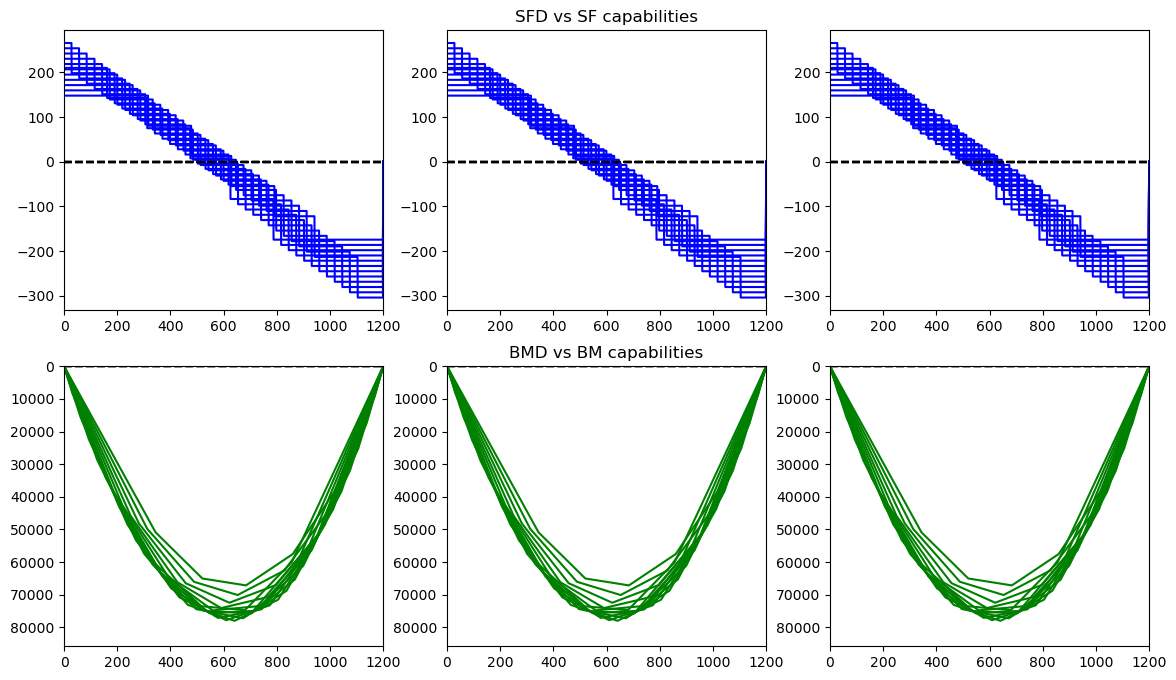

In [14]:
# plot with subplots
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(14, 8))

# check dimensions
print(len(x), len(SFDi[0]))
print(len(bm_loc[0]), len(BMDi[0]))

for col in range(n_train):
    for e in [0, 1, 2]:
        
        # add data to each axis
        axs[0, e].plot(x, SFDi[col], 'b')
        axs[1, e].plot(bm_loc[col], BMDi[col], 'g')

        # set axis limits
        axs[0, e].set_xlim([0, 1200])
        axs[1, e].set_xlim([0, 1200])
        axs[1, e].set_ylim([max(maxB)*1.1, 0])

        # dotted lines on y=0
        axs[0, e].axhline(y = 0, color = 'black', linestyle = '--')
        axs[1, e].axhline(y = 0, color = 'black', linestyle = '--')
        
axs[0, 1].set_title('SFD vs SF capabilities')
axs[1, 1].set_title('BMD vs BM capabilities')
fig.savefig("FINALb_sfbm_capabilities")
print()
print(t_loc[maxS.index(max(maxS))], max(maxS)) 
print(t_loc[maxB.index(max(maxB))], max(maxB))

Visualize shear force and bending moment envelopes

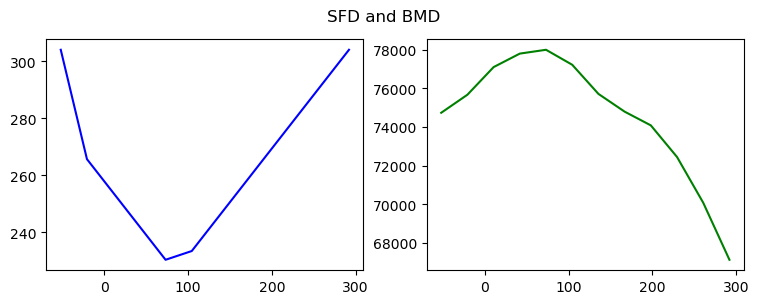

In [4]:
# plot with subplots
fig2, axs2 = plt.subplots(ncols = 2, nrows = 1, figsize=(9, 3))

axs2[0].plot(t_loc, maxS, 'b')
axs2[1].plot(t_loc, maxB, 'g')

fig2.suptitle('SFD and BMD')
fig2.savefig("FINALb_sfbm_envelopes")

## Dimensions and Properties

In [15]:
# Cross-section properties
'''
It is practically design 0 but with same widths for 
top and bottom flange, an so we have 4 glue tabs
'''

n_tfl = 2 # number of top flange layers
tfh = 1.27*n_tfl # top flange height
tfw = 100 # top flange width

bfh = 1.27 # bottom flange height
bfw = 100 # bottom flange width

wh = 75-1.27-1.27 # web height
ww = 1.27 # web width

gth = 1.27 # glue tab height
gtw = 10+1.27 # glue tab width
gta = 10 # width on glue tab where glue is applied

t_height = tfh + bfh + wh + 2*gth
print("Height from Supports to Deck:", t_height, "mm")
print()

# Centroid - Design 0 

A1 = tfh*tfw # top flange
y1 = bfh + wh + 2*gth + (tfh/2)

A2 = gth * gtw # glue tabs
y2a = bfh + wh + gth + (gth/2) # top 2
y2b = bfh + gth/2 # bottom 2

A3 = wh * ww # webs
y3 = bfh + gth + (wh/2)

A4 = bfh * bfw # bottom flange
y4 = bfh/2

num = A1*y1 + 2*A2*y2a + 2*A2*y2b + 2*A3*y3 + A4*y4
denom = A1 + 4*A2 + 2*A3 + A4
cy = num/denom
print("Centroid (\u0233):", cy, "mm")

'''
minim --> "lowest" point of the cross-section,
          value is relative to the centroid.
maxim --> "highest" point of the cross-section,
          value is relative to the centroid.
b --> list of different widths in order from
      top to bottom.
bn --> list of values relative to the centroid
       where width changes
n --> number of layers to sum over

n_cs
In the bridge there may be multilple cross 
sections, so at that point just make multiple 
arrays and I will add in this var so that is the 
only thing you need to manually go in and change.
In theory. Not sure if this will be used as
intended because we are probably using 2 cross
sections at maximum
'''

# Bridge Parameters pt.2 - Design 0
minim = -cy
maxim = (bfh + gth + wh + gth + tfh) -cy
b = [tfw, 2*gtw, 2*ww, 2*gtw, bfw] # top to bottom
bn = [(bfh + gth + wh + gth) - cy, (bfh + gth + wh) - cy, (bfh + gth) - cy, bfh - cy]
n = 1000000

# I - Numerical Integration
def I(minim, maxim, b, bn, n):

    # result (I)
    res = 0
    # incremental thickness of layer i
    dy = (maxim - minim)/n
    # distance between axis of rotation and centre of layer i
    yi = maxim - (dy/2)

    bn.append(minim) # so won't go out of range

    k = 0
    for i in range(n):
        
        res += yi**2*b[k]*dy
        yi -= dy # y changes
        if (yi < bn[k]): # b changes
            k += 1

    return res
    
cI = I(minim, maxim, b, bn, n)
print("Second Moment of Area (I):", cI, "mm\u2074")

Height from Supports to Deck: 78.81000000000002 mm

Centroid (ȳ): 46.811836734693884 mm
Second Moment of Area (I): 684735.2382461126 mm⁴


In [16]:
# Q 

# Q at centroidal axes (bottom)
A = A4 + 2*A2 + 2*(cy-bfh-gth)*ww
num = A4*y4 + 2*A2*y2b + 2*(cy-bfh-gth)*ww*(bfh+gth+(cy-bfh-gth)/2)
cyb = num/A
print("Centroid of chosen area:", cyb, "mm")
d = cy-cyb
print("Area:", A, "mm\u00B2")
print("d:", d, "mm") 
Qcent = A*d
print("Qcent:", Qcent, "mm\u00B3")

# Q at glue location (top)
'''
There will also be glue at the bottom glue tabs
but the top glue tabs are closer to the centroid
so shear stress will be higher. There will also 
be glue between the top flange layers but those 
are further from the centroid and will potentially
have more glue area.

Therefore top glue location is chosen as that is 
where the maximum glue stress will be.
'''
print()
A = tfw*tfh
print("Area:", A, "mm\u00B2")
d = (bfh + gth + wh + gth + tfh) - tfh/2 - cy
print("d:", d, "mm")
Qglue = A*d
print("Qglue:", Qglue, "mm\u00B3")

Centroid of chosen area: 10.855103669625755 mm
Area: 268.0762653061224 mm²
d: 35.95673306506813 mm
Qcent: 9639.146712692627 mm³

Area: 254.0 mm²
d: 30.728163265306137 mm
Qglue: 7804.953469387759 mm³


## Stresses, Local Buckling

In [17]:
print("Maximum shear", max(maxS))
print("Maximum moment", max(maxB))

print()
S_top = (max(maxB)*(bfh+gth+wh+gth+tfh - cy)) / cI
S_bot  = (max(maxB) * cy) / cI
print("Maximum Compressive Bending Stress:", S_top, "MPa")
print("Maximum Tensile Bending Stress:", S_bot, "MPa")

print()
T_cent = (max(maxS) * Qcent) / (cI * 2*ww) # chose bottom area, base is the width at centroid
T_glue = (max(maxS) * Qglue) / (cI * gta*2) # chose top area, base is glue tab width*2
print("Maximum Shear Stress - Matboard:", T_cent, "MPa")
print("Maximum Shear Stress - Glue:", T_glue, "MPa")

Maximum shear 304.10333333333335
Maximum moment 77995.90393939392

Maximum Compressive Bending Stress: 3.644803902119067 MPa
Maximum Tensile Bending Stress: 5.332179968622352 MPa

Maximum Shear Stress - Matboard: 1.6854014998884663 MPa
Maximum Shear Stress - Glue: 0.17331606685176007 MPa


In [18]:
E = 4000 # MPa
poiss = 0.2

S_tens = S_bot
S_comp = S_top
T_max = T_cent
T_gmax = T_glue

# 4 local buckling cases - Design 0
# 75 is the distance between the outer
# edges of the webs
d_webs = 75

# 1 - restrained on both sides
t = tfh
b = d_webs - 2*gtw
k = 4
S_buck1 = (k*(math.pi**2)*E)/(12*(1-poiss**2))*(t/b)**2
print("b:", b, "t:", t)
print("LB Case 1:", S_buck1, "MPa") # this one is a bit concerning

# 2 - restrained on one side
print()
t = tfh
b = (tfw - d_webs) / 2
print("b:", b, "t:", t)
k = 0.425
S_buck2 = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * (t/b)**2
print("LB Case 2:", S_buck2, "MPa")

# 3 - variable stress
print()
t = ww
h = (wh + gth + bfh) - cy # bottom part not under compression
k = 6
S_buck3 = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * (t/h)**2 # questionable af
print("h:", h, "t:", t)
print("LB Case 3:", S_buck3, "MPa")

# 4 - shear  buckling
print()
k = 5
'''
Our diaphragms are a truss so *a* is the distance
between two joints on the bottom / on the top, 
basically the side of the triangle that has no
vertical component.
'''
a = 122  
t = ww
dh = wh
T_buck = (k*(math.pi**2)*E)/(12*(1-poiss**2)) * ((t/dh)**2 + (t/a)**2)
print("LB Case 4:", T_buck, "MPa")

b: 52.46 t: 2.54
LB Case 1: 32.13498560394609 MPa

b: 12.5 t: 2.54
LB Case 2: 60.137254212175414 MPa

h: 28.188163265306116 t: 1.27
LB Case 3: 41.73807291402887 MPa

LB Case 4: 7.120462251404163 MPa


## Factors of Safety

In [19]:
FOS_tens = 30 / S_bot
FOS_comp = 6 / S_top
FOS_shear = 4 / T_cent
FOS_glue = 2 / T_glue

FOS_buck1 = S_buck1 / S_top
FOS_buck2 = S_buck2 / S_top
FOS_buck3 = S_buck3 / S_top 
FOS_buckV = T_buck / T_cent

print()
print("FOS_tens:", FOS_tens)
print("FOS_comp", FOS_comp)
print()
print("FOS_shear", FOS_shear)
print("FOS_glue", FOS_glue)
print()
print("FOS_buck1", FOS_buck1)
print("FOS_buck2", FOS_buck2)
print("FOS_buck3", FOS_buck3)
print("FOS_buckV", FOS_buckV)

min_FOS = min([FOS_tens, FOS_comp, FOS_shear, FOS_glue, FOS_buck1, FOS_buck2, FOS_buck3, FOS_buckV])
print()
print("Minimum FOS", min_FOS)


FOS_tens: 5.626216702462679
FOS_comp 1.646179098006243

FOS_shear 2.3733217279471424
FOS_glue 11.539611048931956

FOS_buck1 8.816656935991263
FOS_buck2 16.499448482595174
FOS_buck3 11.451390537022473
FOS_buckV 4.224786943571232

Minimum FOS 1.646179098006243


## Visualize SF and BM capacities

1305
1305
8

-52 304.10333333333335
73.0909090909091 77995.90393939392


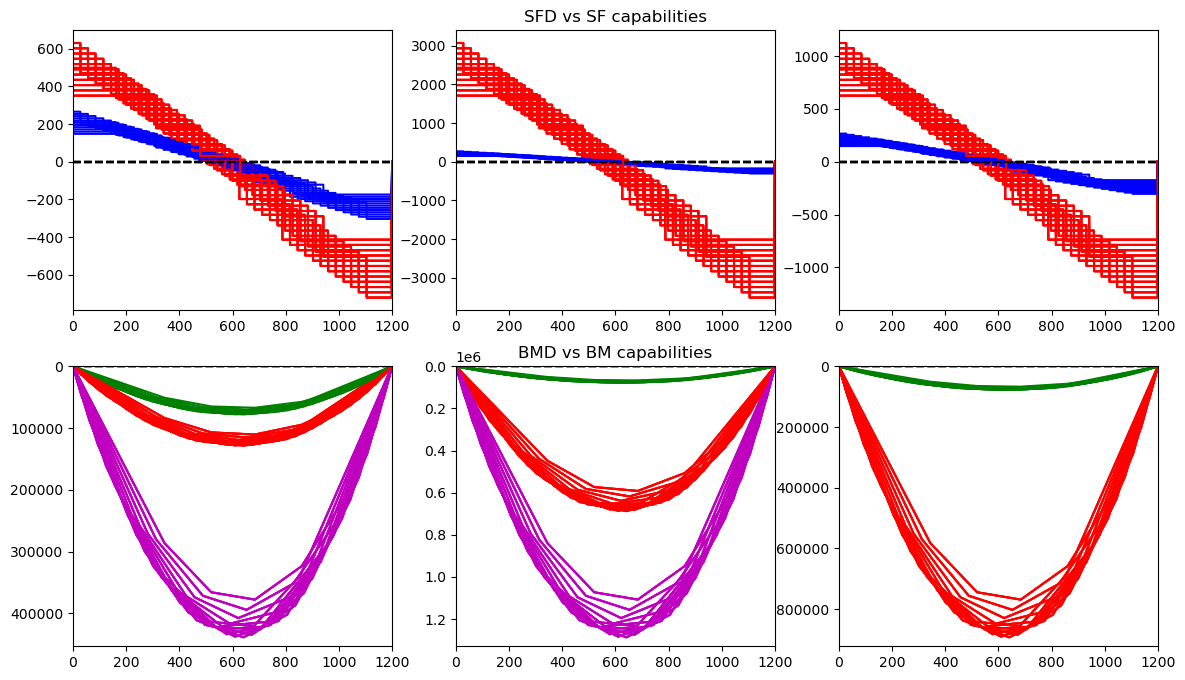

In [10]:
# plot with subplots
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(14, 8))

# check dimensions
print(len(x))
print(len(SFDi[0]))
print(len(BMDi[0]))

for col in range(n_train):
    for e in [0, 1, 2]:
        # add data to each axis
    
        # SFDs, BMDs
        axs[0, e].plot(x, SFDi[col], 'b')
        axs[1, e].plot(bm_loc[col], BMDi[col], 'g')

        # Shear Failure
        Vf_shear = [x * FOS_shear for x in SFDi[col]]
        Vf_glue = [x * FOS_glue for x in SFDi[col]]
        Vf_buckV = [x * FOS_buckV for x in SFDi[col]]
    
        axs[0, 0].plot(x, Vf_shear, 'r')
        axs[0, 1].plot(x, Vf_glue, 'r')
        axs[0, 2].plot(x, Vf_buckV, 'r')

        # Bending Failure
        Mf_tens = [x * FOS_tens for x in BMDi[col]]
        Mf_comp = [x * FOS_comp for x in BMDi[col]]
        Mf_buck1 = [x * FOS_buck1 for x in BMDi[col]]
        Mf_buck2 = [x * FOS_buck2 for x in BMDi[col]]
        Mf_buck3 = [x * FOS_buck3 for x in BMDi[col]]
        
        axs[1, 0].plot(bm_loc[col], Mf_tens, 'm')
        axs[1, 0].plot(bm_loc[col], Mf_comp, 'r')
        axs[1, 1].plot(bm_loc[col], Mf_buck1, 'r')
        axs[1, 1].plot(bm_loc[col], Mf_buck2, 'm')
        axs[1, 2].plot(bm_loc[col], Mf_buck3, 'r')

        # set axis limits

        axs[0, e].set_xlim([0, 1200])
        axs[1, e].set_xlim([0, 1200])

        axs[1, 0].set_ylim([max([max(Mf_tens), max(Mf_comp)])*1.2, 0])
        axs[1, 1].set_ylim([max([max(Mf_buck1), max(Mf_buck2)])*1.2, 0])
        axs[1, 2].set_ylim([max(Mf_buck3)*1.2, 0])

        # dotted lines on y=0
        axs[0, e].axhline(y = 0, color = "black", linestyle = "--")
        axs[1, e].axhline(y = 0, color = "black", linestyle = "--")
        
axs[0, 1].set_title('SFD vs SF capabilities')
axs[1, 1].set_title('BMD vs BM capabilities')
fig.savefig("FINALb_sfbm_capabilities")
fig.show()
print()
print(t_loc[maxS.index(max(maxS))], max(maxS)) 
print(t_loc[maxB.index(max(maxB))], max(maxB))

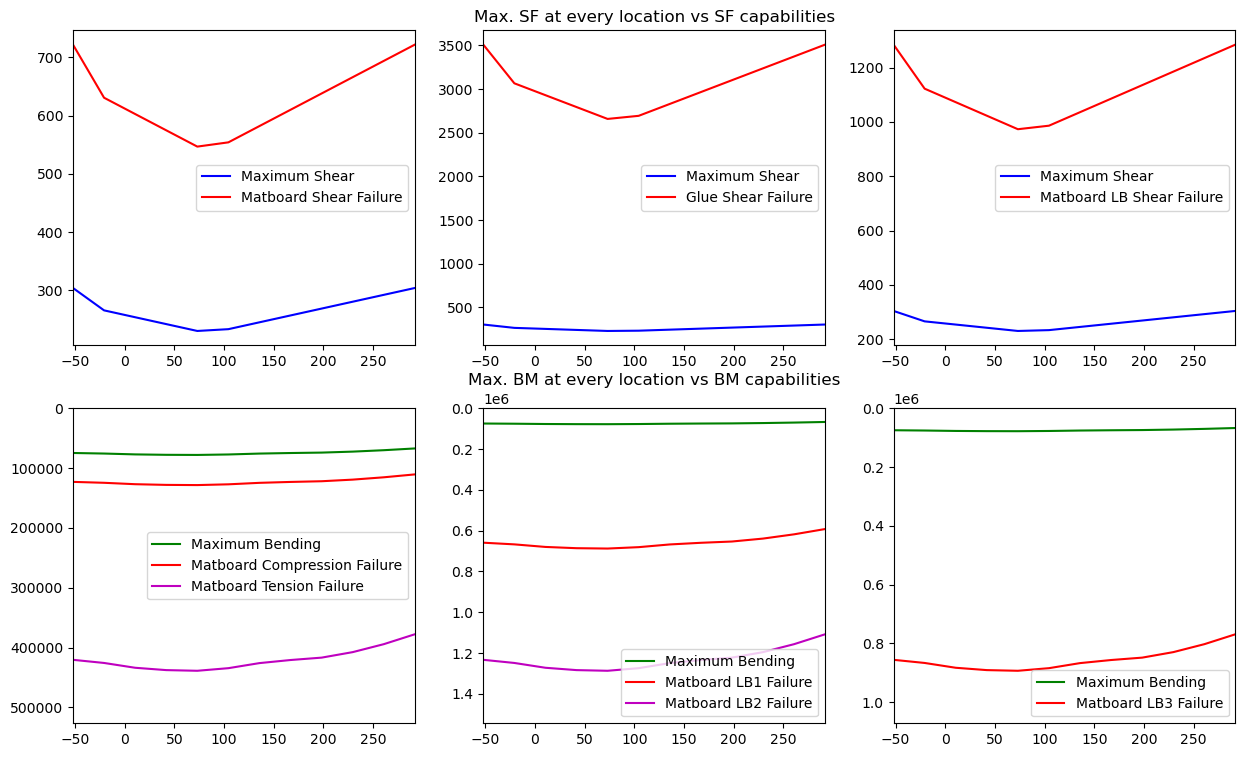

In [11]:
# plot with subplots
fig2, axs2 = plt.subplots(ncols = 3, nrows = 2, figsize=(15, 9))

for e in [0, 1, 2]:

    # max SF and BM
    axs2[0, e].plot(t_loc, maxS, 'b')
    axs2[1, e].plot(t_loc, maxB, 'g')

    # set x-axis limits

    axs2[0, e].set_xlim([-52, 292])
    axs2[1, e].set_xlim([-52, 292])

# Shear Failure  
max_Vshear = [x * FOS_shear for x in maxS]
max_Vglue = [x * FOS_glue for x in maxS]
max_Vbuck = [x * FOS_buckV for x in maxS]
    
axs2[0, 0].plot(t_loc, max_Vshear, 'r')
axs2[0, 1].plot(t_loc, max_Vglue, 'r')
axs2[0, 2].plot(t_loc, max_Vbuck, 'r')

# Bending Failure
max_Mtens = [x * FOS_tens for x in maxB]
max_Mcomp = [x * FOS_comp for x in maxB]
max_Mb1 = [x * FOS_buck1 for x in maxB]
max_Mb2 = [x * FOS_buck2 for x in maxB]
max_Mb3 = [x * FOS_buck3 for x in maxB]
        
axs2[1, 0].plot(t_loc, max_Mcomp, 'r')
axs2[1, 0].plot(t_loc, max_Mtens, 'm')
axs2[1, 1].plot(t_loc, max_Mb1, 'r')
axs2[1, 1].plot(t_loc, max_Mb2, 'm')
axs2[1, 2].plot(t_loc, max_Mb3, 'r')

# set y-axis limits
axs2[1, 0].set_ylim([max([max(max_Mtens), max(max_Mcomp)])*1.2, 0])
axs2[1, 1].set_ylim([max([max(max_Mb1), max(max_Mb2)])*1.2, 0])
axs2[1, 2].set_ylim([max(max_Mb3)*1.2, 0])

# legends
axs2[0, 0].legend(("Maximum Shear", "Matboard Shear Failure"))
axs2[0, 1].legend(("Maximum Shear", "Glue Shear Failure"))
axs2[0, 2].legend(("Maximum Shear", "Matboard LB Shear Failure"))
axs2[1, 0].legend(("Maximum Bending", "Matboard Compression Failure", "Matboard Tension Failure"))
axs2[1, 1].legend(("Maximum Bending", "Matboard LB1 Failure", "Matboard LB2 Failure"))
axs2[1, 2].legend(("Maximum Bending", "Matboard LB3 Failure"))

# Titles
axs2[0, 1].set_title('Max. SF at every location vs SF capabilities')
axs2[1, 1].set_title('Max. BM at every location vs BM capabilities')

fig2.savefig("FINALb_sfbm_envelopes")